<a href="https://colab.research.google.com/github/PepeParra0407/Clases_de_Programaci-n_2025-1/blob/main/Examen3_Moleculas_JoseAlbertoParra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Examen de Jose Alberto Parra Espinoza

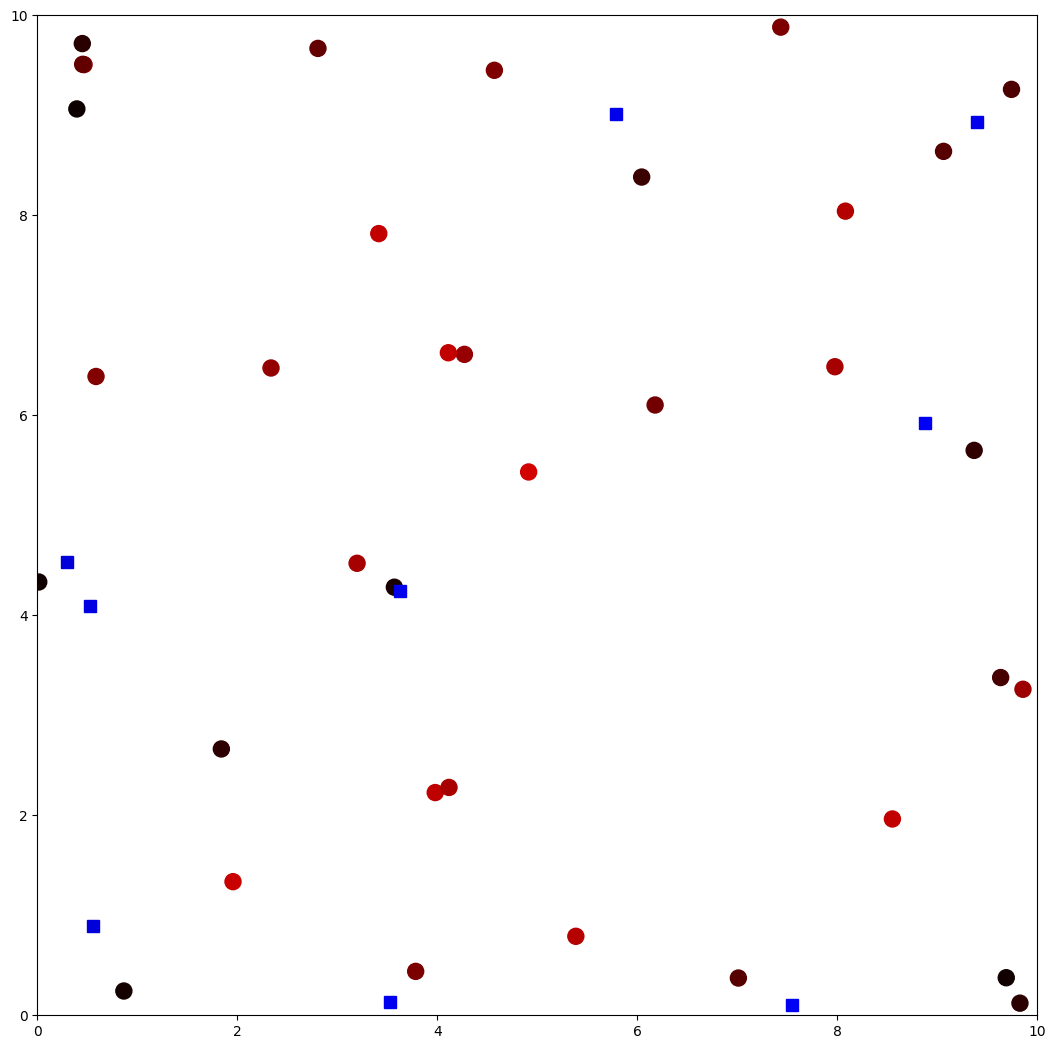

In [6]:
"""
==================
Animación template
==================
Animación de cargas interactuando de acuerdo a interacción por pares regida por ley de Coulumb.
Autor: A. Pimentel
***Modificado por: Jose Alberto Parra Espinoza***
Fecha: 19 de Noviembre 2024

Referencia:
https://matplotlib.org/stable/api/animation_api.html

"""

class Molecula: #Aqui estamos generando la clase molecula, de manera general.

    global q_max, q_min, L #definimos que tendremos un intervalo de cargas entre un valor minimo y maximo.

    def __init__(self): #la funcion __init__ la utilziamos como inicializacion del objeto, se ejecuta cuando creamos un objeto.
        self.x = L*random.uniform(0.1,0.9) #permite ubicar por primera vez nuestra molecula en el plano de manera que permite mover aleatoriamente a un objeto dentro de un intervalo que elegimos.
        self.y = L*random.uniform(0.1,0.9) #en este caso al (Y) igual que la posicion en X, el intervalo es entre 0.1 y 0.9, numeros relativamente peque;os para que el movimiento no sea muy brusco
        self.vx = self.vy = self.ax = self.ay = 0 #nos dice que las velocidades en X y Y son iguales a las aceleraciones en ambos ejes.
        self.q = random.uniform(q_min,q_max) #se elige la magnitud de la carga de la particula de manera aleatoria entre un intervalo definido de minimo y maximo.

        color_q = abs(self.q-q_min)/abs(q_max-q_min) #se elige el color para cada particula con base en el valor de su carga (generada de manera aleatoria), con una ecuacion que promueve multiples colores diferentes.
        if(self.q > 0):
            self.color = (0,0,color_q) #aqui se elige el color de cada particula conforme el codigo RGB, donde R=0, G=0 B=(el valor de self.q), nos da colores azules y cargas positivas.
        else:
            self.color = (color_q,0,0)# si el valor de self.q es menor a cero, entonces se modifica la eleccion de color con el codigo RGB, ahora seria: R: valor de self.q, G=0, B=0, dando colores rojos y con carga negativa

    def actualiza_posicion(self):#definimos la funcion para cambiar la posicion de las moleculas entre cada frame
        global time,t_interval,lista_moleculas #parametros globales de la funcion.
        self.ax = self.ay = ax = ay = 0 #cambio constante en los valores de la aceleracion, o cambio de la posicion
        for molecula in lista_moleculas: #que aplica para cada objeto formado dentro de la clase molecula
            if(molecula != self):#condiconal para comprobar la interaccion entre objetos distintos dentro de la clase molecula
                ax,ay = self.calcula_componentes_fuerza(molecula.x,molecula.y,molecula.q) #definimos que el movimiento en el plano de cada objeto se va a calcular de manera individual, tanto posicion como magnitud de interaccion
                self.ax += ax #variable que va acumulando los nuevos valores de ax. Se le suma a cada objeto el nuevo "vector" generado en x al anterior.
                self.ay += ay #variable que va acumulando los nuevos valores de ay. Se le suma a cada objeto el nuevo "vector" generado en y al anterior.

        self.vx = self.vy = 0 #cada objeto comienza con una velocidad y movimiento en ambos ejes del plano de '0'.

        self.x = self.x + 0.5 * self.ax * math.pow(time,2) + self.vx * time #ecuacion que nos muestra la aceleracion y desplazamiento en x de la molecula en el tiempo. 1/2x*a*t^2*v*t
        self.y = self.y + 0.5 * self.ay * math.pow(time,2) + self.vy * time #ecuacion que nos muestra la aceleracion y desplazamiento en y de la molecula en el tiempo. 1/2x*a*t^2*v*t


    def ajuste_radio_efectivo(self): #definimos la funcion 'ajuste_radio_efectivo' para interaccion entre moleculas.
        for molecula in lista_moleculas: #revisa cada objeto dentro de la clase molecula.
            if(molecula != self):#para que la comparacion e interaccion entre cada objeto sea con otro objeto distinto.
                rx = self.x-molecula.x; ry = self.y-molecula.y #radio efectivo debe de ser minimo a lo que mide el propio radio de cada molecula, osea, diametro + 1 radio.
                r = math.pow(rx,2)+math.pow(ry,2) #radio= radio al cuadrado tanto en x como en y
                if(np.sign(self.q) != np.sign(molecula.q)):#condicion que revisa que las cargas entre moleculas sean distintas.
                    if(r < math.pow(r_efectivo,2)):#si la distancia al cuadrado entre moleculas es menor a la distancia de radio efectivo, hay interaccion. En este caso de atraccion.
                        self.x = self.x + 0.25*random.uniform(-r_efectivo,r_efectivo) #variable que va guardando la nueva posicion del objeto si hay interaccion con otra
                        #con el calculo de un valor aleatorio entre el intervalo del radio efectivo, multiplicado por un valor peque;o para que haya movimiento entre particulas y parezca que se atraen
                        self.y = self.y + 0.25*random.uniform(-r_efectivo,r_efectivo) #lo mismo que en self.x pero ahora en posicion del eje y.

    def condiciones_frontera(self):#funcion condiciones de frontera, para delimitar la dinamica dentro de la caja donde estan los objetos
        global L #parametro global 'L' que es la longitud de las caras de la caja

        if(self.x >= L):#si la posicion del objeto supera la longitud de la caja en x
            self.x = 0.95*L #multiplicar el valor por 0.95 para que la particula rebote en la orilla
        if(self.x <= 0): #si el objeto no interactua con otro objeto
            self.x = 0.05*L #multiplicar por una fraccion del valor de la caja para que se mueva de manera 'lenta'
        if(self.y >= L): #si la posicion del objeto supera la longitud de la caja en y
            self.y = 0.95*L #multiplicar el valor por 0.95 para que la particula rebote en la orilla
        if(self.y <= 0): #si el objeto no interactua con otro objeto
            self.y = 0.05*L #multiplicar por una fraccion del valor de la caja para que se mueva de manera 'lenta'


    def calcula_componentes_fuerza(self,X,Y,Q):#funcion para calcular las variables X, Y, y Q.
        global r_efectivo,K #parametros globales, radio efectivo y K.

        ax = 0; ay = 0 #comienza con aceleracion y movimiento nulo. o 0.
        rx = self.x-X; ry = self.y-Y #calculo de las diferencias en X y Y
        r = math.pow(rx,2)+math.pow(ry,2) #para el calculo de la distancia al cuadrado entre particulas en ambos ejes del plano
        if(r > r_efectivo): #si la distancia al cuadrado es mayor a la del radio efectivo...calcula
            ax = K*(self.q*Q/math.pow(r,3)) * rx #aceleracion con la formula de Coulomb para el eje x, queda como ax= K*q1*q2/r^2
            ay = K*(self.q*Q/math.pow(r,3)) * ry #aceleracion con la formula de Coulomb para el eje y, queda como ax= K*q1*q2/r^2

        return ax,ay #valores calculados en X y Y.

    def dibuja_molecula(self): #funcion para la visualizacion de las particulas.
        global axes, r_particula #parametros globales
        if(self.q < 0): #si la carga es menor a cero...
            axes.add_patch(plt.Circle((self.x, self.y),r_particula,edgecolor = self.color, fc=self.color, lw=1)) #mostrar la particula como un circulo en el plano, con un radio que nosotros definimos, color generado por su carga y el codigo RGB.
        else:
            axes.add_patch(plt.Rectangle((self.x, self.y),1.5*r_particula,1.5*r_particula,edgecolor =self.color,fc=self.color, lw=1))#sino, dibujar rectangulos en el plano, mas grandes que el circulo 1.5veces con los colores generados anteriormente por su carga y el codigo RGB.


######################################################################################################################

def update(frame_number):#funcion que actualiza la animacion, ejecuta una y otra vez hasta que termine la animacion.
    global axes, time,time_interval, r_efectivo,r_particula, lista_moleculas #parametros globales
    time = frame_number*t_interval/1000 #el tiempo de la animacion se calcula dependiendo del numero de frames y la duracion de cada uno de estos.
    axes.cla() #permite cambiar la animacion, no sobreescribirla, limpia el lienzo.

    for molecula in lista_moleculas: #busca cada objeto dentro de la clase moleculas
        molecula.actualiza_posicion() #llama cada una de las funciones generadas
        molecula.ajuste_radio_efectivo() #'''
        molecula.condiciones_frontera() #'''
        molecula.dibuja_molecula() #'''

    axes.set(xlim=(0,L),ylim=(0,L)) #para determinar el tama;o de la caja tanto en X como en Y.




######################################################################################################################


import numpy as np
import math
import random
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

######################################################################################################################

'''45 moleculas donde la carga mas positiva sea 0.01 y la mas negativa sea -0.05,
300 fotogramas de 200ms consecutivos y un radio efectiva de particulas de 0.5'''
L   = 10
time = 0
K  = 8.99 * math.pow(10,6)
K = 1
#
# Sugerencia: usar solamente cargas de MAGNITUD menores a 0.01
q_min = -0.05
#
q_max = 0.01


r_efectivo = 0.5


r_particula = 0.08
n_moleculas = 45

lista_moleculas = []


fig = plt.figure(figsize=(L,L))
axes  = fig.add_axes([0,0, 1, 1], frameon=True)
axes.set_xlim(0,1), axes.set_xticks([])
axes.set_ylim(0,1), axes.set_yticks([])

for i in range(n_moleculas):
    lista_moleculas.append(Molecula())



t_interval = 200;
n_frames = 300;



animation = FuncAnimation(fig, update,frames=n_frames,interval=t_interval)


HTML(animation.to_html5_video())

